# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [58]:
# Model

model = inauguralproject.HouseholdSpecializationModelClass()

# Make a loop for alpha and sigma and print it

alpha = [0.25, 0.50, 0.75]
sigma = [0.5,1.0,1.5]
for i in alpha:
    model.par.alpha = i
    model.solve_discrete(do_print=True)
for j in sigma:
    model.par.sigma = j
    model.solve_discrete(do_print=True)


/Users/bruger/Documents/Documents/Introduction to programming and numerical analysis/projects-2023-mej/inauguralproject/inauguralproject.py:61: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


LM = 2.0000
HM = 6.5000
LF = 7.0000
HF = 2.0000
LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
LM = 6.5000
HM = 2.0000
LF = 2.5000
HF = 6.5000
LM = 6.5000
HM = 2.0000
LF = 2.5000
HF = 6.5000
LM = 6.5000
HM = 2.0000
LF = 2.5000
HF = 6.5000
LM = 6.5000
HM = 2.0000
LF = 2.5000
HF = 6.5000


In [37]:
HF = 2
HM = 6.5
  
result = HF / HM  # Divide using / operator
print("Result:", result)


Result: 0.3076923076923077


In [39]:
HF = 4.5
HM = 4.5
  
result = HF / HM  # Divide using / operator
print("Result:", result)

Result: 1.0


In [56]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

class HouseholdSpecializationModelClass:

    def __init__(self):
        """ setup model """

        # a. create namespaces
        par = self.par = SimpleNamespace()
        sol = self.sol = SimpleNamespace()

        # b. preferences
        par.rho = 2.0
        par.nu = 0.001
        par.epsilon = 1.0
        par.omega = 0.5 

        # c. household production
        par.alpha = 0.5
        par.sigma = 1.0

        # d. wages
        par.wM = 1.0
        par.wF = 1.0
        par.wF_vec = np.linspace(0.8,1.2,5)

        # e. targets
        par.beta0_target = 0.4
        par.beta1_target = -0.1

        # f. solution
        sol.LM_vec = np.zeros(par.wF_vec.size)
        sol.HM_vec = np.zeros(par.wF_vec.size)
        sol.LF_vec = np.zeros(par.wF_vec.size)
        sol.HF_vec = np.zeros(par.wF_vec.size)

        sol.beta0 = np.nan
        sol.beta1 = np.nan

    def calc_utility(self,LM,HM,LF,HF):
        """ calculate utility """

        par = self.par
        sol = self.sol

        # a. consumption of market goods
        C = par.wM*LM + par.wF*LF

        # b. home production
        H = HM**(1-par.alpha)*HF**par.alpha

        # c. total consumption utility
        Q = C**par.omega*H**(1-par.omega)
        utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)

        # d. disutlity of work
        epsilon_ = 1+1/par.epsilon
        TM = LM+HM
        TF = LF+HF
        disutility = par.nu*(TM**epsilon_/epsilon_+TF**epsilon_/epsilon_)
        
        return utility - disutility

    def solve_discrete(self,do_print=False):
        """ solve model discretely """
        
        par = self.par
        sol = self.sol
        opt = SimpleNamespace()
        
        # a. all possible choices
        x = np.linspace(0,24,49)
        LM,HM,LF,HF = np.meshgrid(x,x,x,x) # all combinations
    
        LM = LM.ravel() # vector
        HM = HM.ravel()
        LF = LF.ravel()
        HF = HF.ravel()

        # b. calculate utility
        u = self.calc_utility(LM,HM,LF,HF)
    
        # c. set to minus infinity if constraint is broken
        I = (LM+HM > 24) | (LF+HF > 24) # | is "or"
        u[I] = -np.inf
    
        # d. find maximizing argument
        j = np.argmax(u)
        
        opt.LM = LM[j]
        opt.HM = HM[j]
        opt.LF = LF[j]
        opt.HF = HF[j]

        # e. print
        if do_print:
            for k,v in opt.__dict__.items():
                print(f'{k} = {v:6.4f}')

        return opt

    def solve(self,do_print=False):
        """ solve model continously """

        pass    

    def solve_wF_vec(self,discrete=False):
        """ solve model for vector of female wages """

        pass

    def run_regression(self):
        """ run regression """

        par = self.par
        sol = self.sol

        x = np.log(par.wF_vec)
        y = np.log(sol.HF_vec/sol.HM_vec)
        A = np.vstack([np.ones(x.size),x]).T
        sol.beta0,sol.beta1 = np.linalg.lstsq(A,y,rcond=None)[0]
    
    def estimate(self,alpha=None,sigma=None):
        """ estimate alpha and sigma """

        pass


def plot_HF_HM(alpha_vals, sigma_vals):
    """ Plot HF/HM as a function of female wage for different values of alpha and sigma """

    fig, axes = plt.subplots(nrows=len(alpha_vals), ncols=len(sigma_vals), figsize=(10, 8), sharex=True, sharey=True)

    for i, alpha in enumerate(alpha_vals):
        for j, sigma in enumerate(sigma_vals):
            # Set alpha and sigma in model parameters
            model.par.alpha = alpha
            model.par.sigma = sigma

            # Solve model discretely
            opt = model.solve_discrete()

            # Calculate HF/HM
            HF_HM = opt.HF / opt.HM

            # Plot HF/HM as a function of female wage
            axes[i, j].plot(model.par.wF_vec, HF_HM*np.ones(model.par.wF_vec.size), 'b--')
            axes[i, j].set_xlabel('Female wage')
            axes[i, j].set_ylabel('HF/HM')
            axes[i, j].set_title(r'$\alpha={}$, $\sigma={}$'.format(alpha, sigma))

    # Add common x and y labels
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel('Female wage')
    plt.ylabel('HF/HM')

    plt.tight_layout()
    plt.show()




/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_24573/4071087638.py:60: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


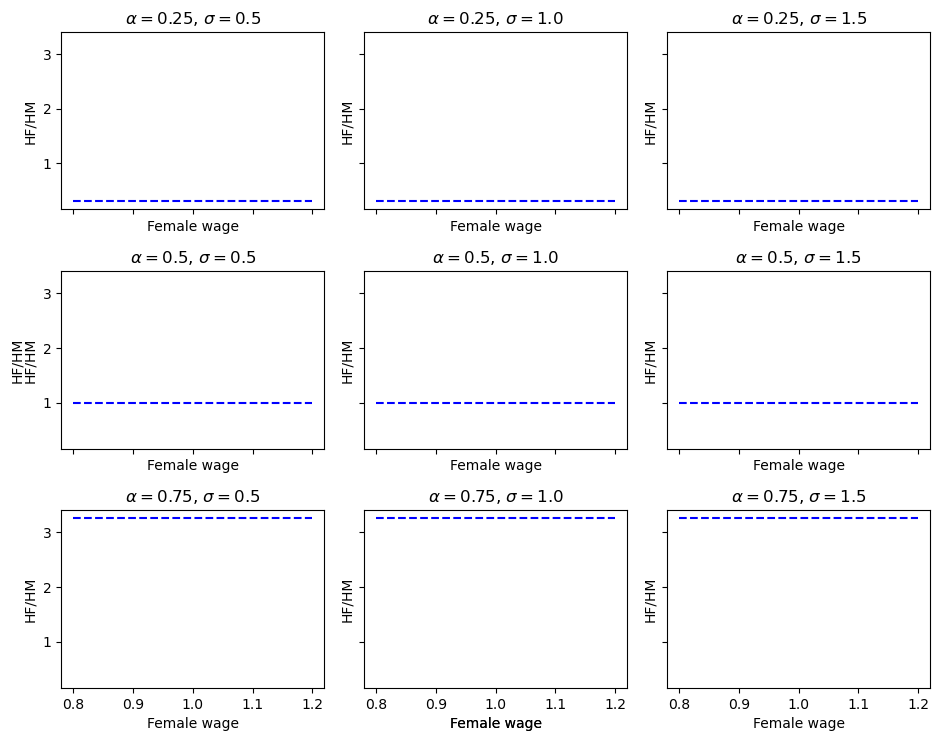

In [57]:
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

model = HouseholdSpecializationModelClass()
plot_HF_HM(alpha_vals, sigma_vals)

# Question 2

Explain your code and procedure

In [ ]:
# code



fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',label='best')

ax.set_xlabel('x')
ax.set_ylabel('f')
ax.legend(loc='lower center',frameon=True);

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.